## Introduction

In this Jupyter Notebook we will create an interactive playground to determine whether the unintuitive answer to the famous Monty Hall problem in probability holds experimentally.

## Installation of Dependencies

First, we begin by installing the necessary dependencies for this notebook.

In [8]:
import numpy as np
import ipywidgets as widgets
import plotly.graph_objects as go

## Experiment

In the following widgets, we can choose the number of experiments, then watch an animated histogram as the experiments run.

In [9]:
# Create a text input widget
style = {'description_width': 'initial'}
text_input = widgets.Text(
    value='',
    placeholder='...',
    description='Number of Experiments:',
    style=style,
    disabled=False
)

# Display the widget
display(text_input)

Text(value='', description='Number of Experiments:', placeholder='...', style=DescriptionStyle(description_wid…

In [10]:
# Setting up a random number generator with a fixed state for reproducibility.
rng = np.random.default_rng(seed=316)

In [11]:
# Core game logic
doors = np.array([0, 1, 2])

def shuffle_doors(doors: np.array) -> np.array:
    return rng.permutation(doors)

def player_choice(doors: np.array) -> int:
    choice = rng.choice(doors)
    return choice

def monty_choice(doors: np.array, player_choice: int) -> int:
    mask = (doors != player_choice) & (doors > 0)
    monty_choices = doors[mask]
    choice = rng.choice(monty_choices)
    return choice

def player_win(doors: np.array, monty_choice: int, player_choice: int) -> bool:
    mask = (doors != player_choice) & (doors != monty_choice)
    switch = doors[mask]
    switch_win = switch[0] == 0
    return switch_win

In [12]:
# Pre-calculate data
####### Old (slow) approach #######
# num_frames = int(text_input.value) if text_input.value.isdigit() else 30
# win_history = []
# loss_history = []
# win_count = 0
# loss_count = 0

# for _ in range(num_frames):
#     curr_doors = shuffle_doors(doors)
#     p_choice = player_choice(curr_doors)
#     m_choice = monty_choice(curr_doors, p_choice)
#     if player_win(curr_doors, m_choice, p_choice):
#         win_count += 1
#     else:
#         loss_count += 1
#     win_history.append(win_count)
#     loss_history.append(loss_count)

# Vectorized simulation for high performance
num_frames = int(text_input.value) if text_input.value.isdigit() else 30

# Generate all random choices at once
# 0 = Car, 1 & 2 = Goats
actual_car_positions = rng.integers(0, 3, size=num_frames)
initial_player_choices = rng.integers(0, 3, size=num_frames)

# In Monty Hall (switching strategy): 
# You win if your initial choice was NOT the car.
# (Because Monty must reveal the only other goat, leaving the car as the only switch option).
wins = (initial_player_choices != actual_car_positions)
win_history = np.cumsum(wins)
loss_history = np.cumsum(~wins)

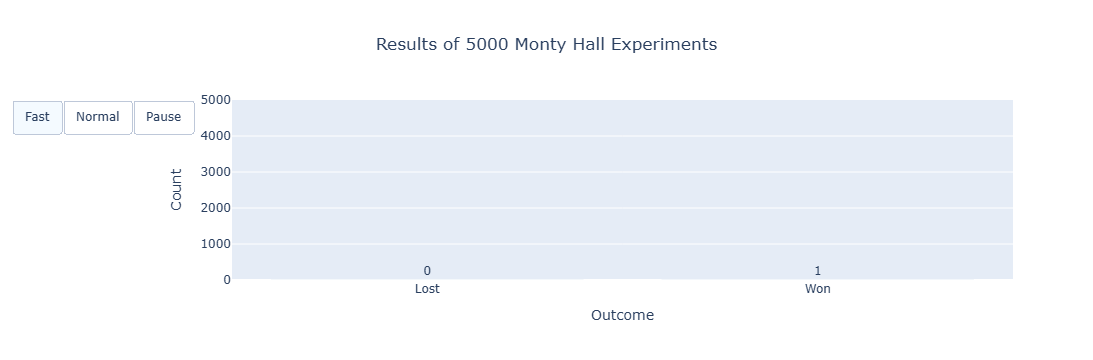

In [13]:
# Create Plotly animation with speed controls
fig = go.Figure(
    data=[go.Bar(
        x=["Lost", "Won"], 
        y=[loss_history[0], win_history[0]], 
        text=[loss_history[0], win_history[0]], 
        textposition='outside'
    )],
    layout=go.Layout(
        title=dict(
            text=f"Results of {num_frames} Monty Hall Experiments",
            x=0.5,
            xanchor="center"
        ),
        xaxis_title="Outcome",
        yaxis_title="Count",
        yaxis=dict(range=[0, num_frames]),
        updatemenus=[dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(label="Fast", 
                     method="animate", 
                     args=[None, 
                           {"frame": {"duration": 0, "redraw": True}, 
                            "fromcurrent": True}]),
                dict(label="Normal", 
                     method="animate", 
                     args=[None, {"frame": {"duration": 200, "redraw": True}, 
                                  "fromcurrent": True}]),
                dict(label="Pause", 
                     method="animate", 
                     args=[[None], 
                           {"frame": {"duration": 0, "redraw": False}, 
                            "mode": "immediate"}])
            ]
        )]
    ),
    frames=[go.Frame(
        data=[go.Bar(y=[loss_history[i], 
                        win_history[i]], 
                        text=[loss_history[i], 
                              win_history[i]])]) 
            for i in range(num_frames)]
)

fig.show()